<a href="https://colab.research.google.com/github/Nagu34/Thesis/blob/main/UrbanSound8k_Datatest_Augmented.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#package imports
import os
import random
import sys
import glob 
import keras

import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as py
import plotly.tools as tls
import seaborn as sns
import scipy.io.wavfile
import tensorflow as tf
py.init_notebook_mode(connected=True)


## Keras
from keras import regularizers
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from keras.callbacks import  History, ReduceLROnPlateau, CSVLogger
from keras.models import Model, Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.utils import np_utils
from keras.utils import to_categorical


## Sklearn
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder


## Rest
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
from tqdm import tqdm

## extra added 
import pandas as pd
import numpy as np
import os
import librosa
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
from scipy import stats
import warnings
import seaborn as sns
import multiprocessing as mp
%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np
import os
import librosa
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
from scipy import stats
import warnings
import seaborn as sns
import multiprocessing as mp
%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np
from skimage.io import imread
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline

import keras
from keras import optimizers
from keras.utils import to_categorical
from keras.layers import Input, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Activation, concatenate
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.normalization import BatchNormalization
from keras.models import Model
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.layers import multiply,dot,average,GlobalMaxPooling2D

In [ ]:
src_path='/content/drive/My Drive/UrbanSound8K/audio/'
dir_list=os.listdir(src_path)
dir_list.sort()
print(dir_list)

['fold1', 'fold10', 'fold2', 'fold3', 'fold4', 'fold5', 'fold6', 'fold7', 'fold8', 'fold9']


In [ ]:
src_path="/content/drive/My Drive/UrbanSound8K/audio/fold3"
target_dir="/content/drive/My Drive/UrbanSound8K/audio_augmentations2"
dir_list=os.listdir(src_path)
dir_list.sort()
for sound_files in tqdm(dir_list):
    #print(sound_files)
     sound_file= sound_files.split('.')[0].split('-')
    #print(emotion_file)
     path= src_path + '/' + sound_files
     #data, sample_rate = read_audio_file(path)
     data,sample_rate = librosa.core.load(path)
     data_noise = add_noise(data)
     outfile = sound_files.split('.')[0] + "-" + "aug" + ".wav"
     outfile = target_dir + '/' + outfile
     write_audio_file(outfile, data_noise,sample_rate)
     data_roll = shift(data,sample_rate)
     outfile = sound_files.split('.')[0] + "-" + "aug1" + ".wav"
     outfile = target_dir + '/' + outfile
     write_audio_file(outfile, data_roll,sample_rate)
     # change of pitch the sound
     data_pitch = pitch(data)
     outfile = sound_files.split('.')[0] + "-" + "aug2" + ".wav"
     outfile = target_dir + '/' + outfile
     write_audio_file(outfile, data_pitch,sample_rate)
     #change of dynamic range
     data_range = range(data_pitch)
     outfile = sound_files.split('.')[0] + "-" + "aug3" + ".wav"
     outfile = target_dir + '/' + outfile
     write_audio_file(outfile, data_range,sample_rate)

100%|██████████| 925/925 [19:35<00:00,  1.27s/it]


In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt


def add_noise(data):
        data_noise = data + 0.009*np.random.normal(0,1,len(data))
        return data_noise
def shift(data,sample_rate):
        return np.roll(data,int(sample_rate/10))
def pitch(y):
    y_mod=y
    length_change = np.random.uniform(low=0.9,high=1.1)
    speed_fac = 1.0  / length_change
    #print(tab+"    resample length_change = ",length_change)
    tmp = np.interp(np.arange(0,len(y),speed_fac),np.arange(0,len(y)),y)
    #tmp = resample(y,int(length*lengt_fac))    # signal.resample is too slow
    minlen = min( y.shape[0], tmp.shape[0])     # keep same length as original; 
    y_mod *= 0                                    # pad with zeros 
    y_mod[0:minlen] = tmp[0:minlen]
    return y_mod
def range(y_mod):
    dyn_change = np.random.uniform(low=0.5,high=1.1)  # change amplitude
    #print(tab+"    dyn_change = ",dyn_change)
    y_mod = y_mod * dyn_change
    return y_mod
def write_audio_file(file, data, sample_rate):
        librosa.output.write_wav(file, data, sample_rate)

In [ ]:
def log_specgram(audio, sample_rate, window_size=5,
                 step_size=2, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, _, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False,
                            )
    return freqs, np.log(spec.T.astype(np.float32) + eps)

In [ ]:
def wav2img(wav_path, targetdir='', figsize=(1.28,1.28)):
    """
    takes in wave file path
    and the fig size. Default 4,4 will make images 224 x 224
    """
    import pylab
    from matplotlib import cm
    pylab.figure(figsize=figsize) 
    pylab.axis('off')
    pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[])   
    # use soundfile library to read in the wave files
    test_sound,samplerate  = librosa.load(wav_path)
    test_sound, index1= librosa.effects.trim(test_sound)
    _, spectrogram = log_specgram(test_sound, samplerate)
    
    ## create output path
    output_file = wav_path.split('/')[-1].split('.wav')[0]
    output_file = targetdir +'/'+ output_file
    #plt.figure(figsize=(2.24, 2.24), dpi=100)
    #plt.axis('off')
    #plt.imshow(spectrogram.T, aspect='auto', origin='lower')
    #pylab.figure(1, figsize=(2.24,2.24))
    librosa.display.specshow(spectrogram, y_axis='mel', x_axis='time',cmap=cm.jet)
    #plt.show()
    #pylab.plot(spectrogram)
    pylab.savefig('%s.png' % output_file,bbox_inches=None, pad_inches=0,dpi=100)

    #plt.savefig('%s.png' % output_file,transparent=False,dpi=100)
    
    #plt.imsave('%s.png' % output_file, spectrogram.T)
    pylab.close()
    #plt.close()

In [ ]:
src_path="/content/drive/MyDrive/ESC-50-master/audio_augmentations1/val/audio_augmentations"

In [ ]:
target_dir="/content/drive/MyDrive/ESC-50-master/ESC_RGBA_128_CHR_aug"

In [ ]:
for file_list in tqdm(os.listdir(src_path)):
     wav2img(src_path + '/' + file_list, target_dir)
     #convert(src_path  + '/' + file_list, target_dir)


100%|██████████| 3000/3000 [58:45<00:00,  1.18s/it]


In [ ]:
def wav2img(wav_path, targetdir='', figsize=(1.28,1.28)):
    """
    takes in wave file path
    and the fig size. Default 4,4 will make images 224 x 224
    """
    import pylab
    from matplotlib import cm
    pylab.figure(figsize=figsize) 
    pylab.axis('off')
    pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[])   
    # use soundfile library to read in the wave files
    test_sound,samplerate  = librosa.load(wav_path)
    test_sound, index1= librosa.effects.trim(test_sound)
    #_, spectrogram = log_specgram(test_sound, samplerate)
    #hop_length = 512
    #chromagram = librosa.feature.chroma_stft(test_sound, sr=samplerate, hop_length=hop_length)
    N = 4096
    H = 512 
    eps = np.finfo(float).eps
    C = librosa.feature.chroma_stft(y=test_sound, sr=samplerate, tuning=0, norm=None, hop_length=H, n_fft=N)
    ## create output path
    output_file = wav_path.split('/')[-1].split('.wav')[0]
    output_file = targetdir +'/'+ output_file
    #plt.figure(figsize=(2.24, 2.24), dpi=100)
    #plt.axis('off')
    #plt.imshow(spectrogram.T, aspect='auto', origin='lower')
    #pylab.figure(1, figsize=(2.24,2.24))
    #librosa.display.specshow(spectrogram, y_axis='mel', x_axis='time',cmap=cm.jet)
    #librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
    librosa.display.specshow(10 * np.log10(eps + C), x_axis='time', y_axis='chroma', sr=samplerate, hop_length=H)
    #plt.show()
    #pylab.plot(spectrogram)
    pylab.savefig('%s.png' % output_file,bbox_inches=None, pad_inches=0,dpi=100)

    #plt.savefig('%s.png' % output_file,transparent=False,dpi=100)
    
    #plt.imsave('%s.png' % output_file, spectrogram.T)
    pylab.close()
    #plt.close()

In [ ]:
from PIL import Image
from numpy import asarray

In [ ]:
def convert(png_path, targetdir=''):
    im=Image.open(png_path)
    output_file = png_path.split('/')[-1].split('.png')[0]
    output_file = targetdir +'/'+ output_file
    im.convert('RGB').save("%s.jpg" %output_file)



In [ ]:
src_path="/content/drive/MyDrive/ESC-50-master/ESC_RGBA_128_SPE_aug"
target_dir="/content/drive/MyDrive/ESC-50-master/ESC_RGB_128_SPE_aug"

In [ ]:
for file_list in tqdm(os.listdir(src_path)):
     #wav2img(src_path + '/' + file_list, target_dir)
     convert(src_path  + '/' + file_list, target_dir)

100%|██████████| 8000/8000 [13:04<00:00, 10.20it/s] 


In [ ]:
src_path="/content/drive/My Drive/UrbanSound8K/audio_augmentations"
src_path1="/content/drive/My Drive/UrbanSound8K/audio_rgba_augmentations"

In [ ]:
import numpy as np
max_pad_len = 217
def extract_features(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        pad_width = max_pad_len - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
    
        
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        return None 
     
    return mfccs

In [ ]:
src_path="/content/drive/MyDrive/ESC-50-master/audio_augmentations/audio_augmentations"

In [ ]:
data_df = pd.DataFrame(columns=['path','sound'])
count=0
features=[]
dir_list=os.listdir(src_path)
dir_list.sort()
for sound_files in tqdm(dir_list):
    #print(sound_files)
     sound_file= sound_files.split('.')[0].split('-')
    #print(emotion_file)
     path= src_path + '/' + sound_files
    #print(path)
     file_name=os.path.abspath(path)
     data = extract_features(file_name)
     sound=int(sound_file[3])
     features.append([data, sound])
    #print(emotion)
     data_df.loc[count] = [path,sound]
     count += 1
    #print("------------------------------")
    #print("++++++++++++++++++++++++++++++++++++++++++++++")
featuresdf = pd.DataFrame(features, columns=['feature','sound'])
featuresdf.to_pickle('/content/drive/My Drive/ESC-50-master/esc_mfcc_aug.pkl')

100%|██████████| 8000/8000 [2:57:44<00:00,  1.33s/it]


In [ ]:
featuresdf

,feature,sound
0,"[[-260.556799133952, -258.9153047164046, -259....",0
1,"[[-625.2565894025023, -625.2565894025023, -625...",0
2,"[[-622.9055949983652, -622.9055949983652, -622...",0
3,"[[-641.0058468162614, -641.0058468162614, -641...",0
4,"[[-143.13743607040084, -145.93355874331442, -1...",14
...,...,...
7995,"[[-43.48348316597714, -55.86440021356729, -69....",8
7996,"[[-265.7655921467211, -255.02145562371598, -16...",0
7997,"[[-595.9850826087672, -595.9850826087672, -595...",0
7998,"[[-539.4842603917743, -481.3436254203545, -264...",0


In [ ]:
import numpy as np
max_pad_len = 174
def extract_features(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        pad_width = max_pad_len - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
    
        
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        return None 
     
    return mfccs

In [ ]:
extract_features("/content/drive/MyDrive/ESC-50-master/audio_augmentations/audio_augmentations/1-100032-A-0-aug.wav")

Error encountered while parsing file:  /content/drive/MyDrive/ESC-50-master/audio_augmentations/audio_augmentations/1-100032-A-0-aug.wav


In [ ]:
src_path="/content/drive/MyDrive/ESC-50-master/audio_augmentations/audio_augmentations"

In [ ]:
data_df = pd.DataFrame(columns=['path','sound'])
count=0
features=[]
dir_list=os.listdir(src_path)
dir_list.sort()
for sound_files in tqdm(dir_list):
    #print(sound_files)
     sound_file= sound_files.split('.')[0].split('-')
    #print(emotion_file)
     path= src_path + '/' + sound_files
    #print(path)
     file_name=os.path.abspath(path)
     data = extract_features(file_name)
     sound=int(sound_file[1])
     features.append([data, sound])
    #print(emotion)
     data_df.loc[count] = [path,sound]
     count += 1
    #print("------------------------------")
    #print("++++++++++++++++++++++++++++++++++++++++++++++")
featuresdf = pd.DataFrame(features, columns=['feature','sound'])
featuresdf.to_pickle('/content/drive/My Drive/UrbanSound8K/mfcc_aug1.pkl')

100%|██████████| 3552/3552 [1:16:39<00:00,  1.29s/it]


In [ ]:
featuresdf[0:10]

,feature,sound
0,"[[-323.8797027562813, -315.7277809532051, -312...",2
1,"[[-680.2892993405603, -676.598708956871, -682....",2
2,"[[-794.0936818010065, -784.1974424666156, -768...",2
3,"[[-818.9717531762269, -809.7580295337414, -794...",2
4,"[[-325.57910028966216, -321.136822616801, -317...",22
5,"[[-713.699936888719, -709.9854353622703, -698....",22
6,"[[-703.9031336298652, -708.2520636163649, -722...",22
7,"[[-732.6971524868021, -734.4955691389483, -746...",22
8,"[[-313.9181800229512, -312.65550275208886, -31...",23
9,"[[-750.190013991363, -742.8886130013237, -742....",23


In [ ]:
src_path="/content/drive/MyDrive/UrbanSound8K/audio_rgb_chroma_augmentations2_128/"

In [ ]:
data_df_aug2 = pd.DataFrame(columns=['path','sound'])
count=0
dir_list=os.listdir(src_path)
dir_list.sort()
for sound_files in tqdm(dir_list):
    #print(sound_files)
     sound_file= sound_files.split('.')[0].split('-')
    #print(emotion_file)
     path= src_path + '/' + sound_files
    #print(path)
     sound=int(sound_file[1])
    #print(emotion)
     data_df_aug2.loc[count] = [path,sound]
     count += 1
    #print("------------------------------")
    #print("++++++++++++++++++++++++++++++++++++++++++++++")

100%|██████████| 3700/3700 [00:09<00:00, 384.05it/s]


In [ ]:
data_df_aug2

,path,sound
0,/content/drive/MyDrive/UrbanSound8K/audio_rgb_...,3
1,/content/drive/MyDrive/UrbanSound8K/audio_rgb_...,3
2,/content/drive/MyDrive/UrbanSound8K/audio_rgb_...,3
3,/content/drive/MyDrive/UrbanSound8K/audio_rgb_...,3
4,/content/drive/MyDrive/UrbanSound8K/audio_rgb_...,4
...,...,...
3695,/content/drive/MyDrive/UrbanSound8K/audio_rgb_...,9
3696,/content/drive/MyDrive/UrbanSound8K/audio_rgb_...,9
3697,/content/drive/MyDrive/UrbanSound8K/audio_rgb_...,9
3698,/content/drive/MyDrive/UrbanSound8K/audio_rgb_...,9


In [ ]:
import pandas as pd
import numpy as np
from skimage.io import imread
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline

import keras
from keras import optimizers
from keras.utils import to_categorical
from keras.layers import Input, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Activation, concatenate
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.normalization import BatchNormalization
from keras.models import Model
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [ ]:
def read_spectograms(file_paths, img_rows, img_cols, as_gray, channels):
  """
  Reads the spectogram files from disk and normalizes the pixel values
    @params:
      file_paths - Array of file paths to read from
      img_rows - The image height.
      img_cols - The image width.
      as_grey - Read the image as Greyscale or RGB.
      channels - Number of channels.
    @returns:
      The created and compiled model (Model)        
  """
  images = []
  
  for file_path in tqdm(file_paths):
    images.append(imread(file_path, as_gray = as_gray))
  
  images = np.asarray(images, dtype=np.float32)
  
  # normalize
  images = images / np.max(images)
  
  # reshape to match Keras expectaions
  images = images.reshape(images.shape[0], img_rows, img_cols, channels)

  return images

In [ ]:
x_train_chroma_aug = read_spectograms(data_df_aug2.path.values, img_rows, img_cols, as_gray, in_channel)
np.save('/content/drive/My Drive/UrbanSound8K/x_train_rgb_128_chroma_aug2.npy', x_train_chroma_aug)

100%|██████████| 3700/3700 [00:05<00:00, 664.29it/s]


In [ ]:
src_path='/content/drive/My Drive/UrbanSound8K/spectrogram_rgb_128_spectrogram_audio/'
dir_list=os.listdir(src_path)
dir_list.sort()
print(dir_list)

['fold1', 'fold10', 'fold2', 'fold3', 'fold4', 'fold5', 'fold6', 'fold7', 'fold8', 'fold9']


In [ ]:
data_df = pd.DataFrame(columns=['path','sound'])
count=0
for directories in dir_list:
    file_list=os.listdir(src_path + directories)
    file_list.sort()
    for sound_files in file_list:
        #print(sound_files)
        sound_file= sound_files.split('.')[0].split('-')
        #print(emotion_file)
        path= src_path + directories + '/' + sound_files
        #print(path)
        sound=int(sound_file[1])
        #print(emotion)
        data_df.loc[count] = [path,sound]
        count += 1
        #print("------------------------------")
    #print("++++++++++++++++++++++++++++++++++++++++++++++")

In [ ]:
data_df

,path,sound
0,/content/drive/My Drive/UrbanSound8K/spectrogr...,3
1,/content/drive/My Drive/UrbanSound8K/spectrogr...,3
2,/content/drive/My Drive/UrbanSound8K/spectrogr...,3
3,/content/drive/My Drive/UrbanSound8K/spectrogr...,3
4,/content/drive/My Drive/UrbanSound8K/spectrogr...,6
...,...,...
8727,/content/drive/My Drive/UrbanSound8K/spectrogr...,2
8728,/content/drive/My Drive/UrbanSound8K/spectrogr...,2
8729,/content/drive/My Drive/UrbanSound8K/spectrogr...,2
8730,/content/drive/My Drive/UrbanSound8K/spectrogr...,2


In [ ]:
labels = data_df.sound.values

In [ ]:
labels_aug1=data_df_aug2.sound.values

In [ ]:
labels_aug1.shape

(3700,)

In [ ]:
labels_new=np.append(labels,labels_aug)

In [ ]:
labels_new

array([3, 3, 3, ..., 9, 9, 9], dtype=object)

In [ ]:
#labels = data_df.sound.values

# convert class vectors to binary class matrices One Hot Encoding
labels = keras.utils.to_categorical(labels, 10)

In [ ]:
labels_old = np.load('/content/drive/MyDrive/UrbanSound8K/labels_augmentedfull1.npy') 

In [ ]:
labels_old.shape

(14853, 10)

In [ ]:
labels=np.append(labels_old,labels,axis=0)

In [ ]:
labels.shape

(18553, 10)

In [ ]:
np.save('/content/drive/My Drive/UrbanSound8K/labels_augmentedfull2.npy', labels)

In [ ]:
x_train_spectrogram = np.load('/content/drive/MyDrive/UrbanSound8K/x_train_rgb_128_spectrogram_augmentedfull1.npy')
x_train_spectrogram_aug = np.load('/content/drive/MyDrive/UrbanSound8K/x_train_rgb_128_spectrogram_aug2.npy')
x_train_chroma = np.load('/content/drive/MyDrive/UrbanSound8K/x_train_rgb_128_chroma_augmentedfull1.npy')
x_train_chroma_aug = np.load('/content/drive/MyDrive/UrbanSound8K/x_train_rgb_128_chroma_aug2.npy')

In [ ]:
x_train_chroma_new=np.append(x_train_chroma,x_train_chroma_aug,axis=0)
np.save('/content/drive/My Drive/UrbanSound8K/x_train_rgb_128_chroma_augmentedfull2.npy', x_train_chroma_new)

In [ ]:
x_train_spectrogram_new=np.append(x_train_spectrogram,x_train_spectrogram_aug,axis=0)
np.save('/content/drive/My Drive/UrbanSound8K/x_train_rgb_128_spectrogram_augmentedfull2.npy', x_train_spectrogram_new)

In [ ]:
featuresdf=pd.read_pickle('/content/drive/My Drive/UrbanSound8K/mfcc_aug2.pkl')
featuresdf_old=pd.read_pickle('/content/drive/MyDrive/UrbanSound8K/mfcc_augemtedfull1_128.pkl')

In [ ]:
x_train_spectrogram_new.shape

(14853, 128, 128, 3)

In [ ]:
features_df=featuresdf_old.append(featuresdf)

In [ ]:
labels = np.load('/content/drive/MyDrive/UrbanSound8K/labels_augmentedfull2.npy') 
x_train_spectrogram = np.load('/content/drive/My Drive/UrbanSound8K/x_train_rgb_128_spectrogram_augmentedfull2.npy')
x_train_chroma = np.load('/content/drive/My Drive/UrbanSound8K/x_train_rgb_128_chroma_augmentedfull2.npy')

In [ ]:
labels = np.load('/content/drive/MyDrive/UrbanSound8K/labels_128.npy') 
x_train_spectrogram = np.load('/content/drive/MyDrive/UrbanSound8K/x_train_rgb_128_spectrogram.npy')
x_train_chroma = np.load('/content/drive/MyDrive/UrbanSound8K/x_train_rgb_128_chroma.npy')

In [ ]:
labels=np.load('/content/drive/MyDrive/UrbanSound8K/labels.npy')

In [ ]:
x_train_spectrogram.shape

(18553, 128, 128, 3)

In [ ]:
labels.shape

(18553, 10)

In [ ]:
#x_train_spectrogram = np.load('/content/drive/My Drive/UrbanSound8K/x_train_rgb_224_spectrogram.npy') 
x_train_spectrogram, x_test_spectrogram, y_spec_train, y_spec_test = train_test_split(x_train_spectrogram, labels, test_size = 0.2, random_state=666)
x_train_chroma, x_test_chroma, y_chr_train, y_chr_test = train_test_split(x_train_chroma, labels, test_size = 0.2, random_state=666)

In [ ]:
#x_train_spectrogram = np.load('/content/drive/My Drive/UrbanSound8K/x_train_rgb_224_spectrogram.npy') 
x_val_spectrogram, x_test_spectrogram, y_val, y_test = train_test_split(x_test_spectrogram, y_spec_test, test_size = 0.5, random_state=666)
x_val_chroma, x_test_chroma, y_val, y_test = train_test_split(x_test_chroma, y_chr_test, test_size = 0.5, random_state=666)

In [ ]:
def create_convolution_layers(input_img):
  model = Conv2D(32, (3, 3), padding='same', input_shape=input_shape)(input_img)
  model = LeakyReLU(alpha=0.1)(model)
  model = MaxPooling2D((2, 2),padding='same')(model)
  model = Dropout(0.25)(model)
  
  model = Conv2D(64, (3, 3), padding='same')(model)
  model = LeakyReLU(alpha=0.1)(model)
  model = MaxPooling2D(pool_size=(2, 2),padding='same')(model)
  model = Dropout(0.25)(model)
    
  model = Conv2D(64, (3, 3), padding='same')(model)
  model = LeakyReLU(alpha=0.1)(model)
  model = MaxPooling2D(pool_size=(2, 2),padding='same')(model)
  model = Dropout(0.25)(model)

  model = Conv2D(128, (3, 3), padding='same')(model)
  model = LeakyReLU(alpha=0.1)(model)
  model = MaxPooling2D(pool_size=(2, 2),padding='same')(model)
  model = Dropout(0.25)(model)
  

  model = GlobalAveragePooling2D()(model)
    
  return model

In [ ]:
def create_convolution_layers1(input_img):
    base_model2 = keras.applications.InceptionV3(weights='imagenet',include_top=False)
    x = base_model2(input_img, training=True)
    # Convert features of shape `base_model.output_shape[1:]` to vectors
    x = keras.layers.GlobalAveragePooling2D()(x)
    return x


In [ ]:
def create_convolution_layers2(input_img):
    base_model2 = keras.applications.VGG19(weights='imagenet',include_top=False)
    x = base_model2(input_img, training=True)
    # Convert features of shape `base_model.output_shape[1:]` to vectors
    x = keras.layers.GlobalAveragePooling2D()(x)
    return x

In [ ]:
def create_convolution_layers3(input_img):
    base_model2 = keras.applications.Xception(weights='imagenet',include_top=False)
    x = Conv2D(3,(3,3),padding='same')(input_img)
    x = base_model2(x, training=True)
    # Convert features of shape `base_model.output_shape[1:]` to vectors
    x = keras.layers.GlobalAveragePooling2D()(x)
    return x

In [ ]:
def create_convolution_layers1(input_img):
    x = Conv2D(3,(3,3),padding='same')(input_img)
    conv1  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(x)
    conv2  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(conv1)
    pool1  = MaxPooling2D((2, 2))(conv2)
    conv3  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(pool1)
    conv4  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(conv3)
    pool2  = MaxPooling2D((2, 2))(conv4)
    conv5  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(pool2)
    conv6  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv5)
    conv7  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv6)
    pool3  = MaxPooling2D((2, 2))(conv7)
    conv8  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool3)
    conv9  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv8)
    conv10 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv9)
    pool4  = MaxPooling2D((2, 2))(conv10)
    conv11 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool4)
    conv12 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv11)
    conv13 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv12)
    pool5  = MaxPooling2D((2, 2))(conv13)

    model = GlobalAveragePooling2D()(pool5)
    return model

In [ ]:
def create_convolution_layers(input_img):
  model = Conv2D(32, (3, 3), padding='same',activation='relu' ,input_shape=input_shape)(input_img)
  model = BatchNormalization()(model) 
  model = Conv2D(32,(3,3),activation='relu')(model)
  model = BatchNormalization()(model) 
  #model = LeakyReLU(alpha=0.1)(model)
  model = MaxPooling2D((2, 2),padding='same')(model)
  model = Dropout(0.25)(model)
  
  model = Conv2D(64, (3, 3), padding='same',activation='relu')(model)
  model = BatchNormalization()(model) 
  model = Conv2D(64, (3, 3),activation='relu')(model)
  model = BatchNormalization()(model) 
  #model = LeakyReLU(alpha=0.1)(model)
  model = MaxPooling2D(pool_size=(2, 2),padding='same')(model)
  model = Dropout(0.25)(model)
    
  model = Conv2D(64, (3, 3), padding='same',activation='relu')(model)
  model = BatchNormalization()(model) 
  model = Conv2D(64, (3, 3), activation='relu')(model)
  model = BatchNormalization()(model) 
  #model = LeakyReLU(alpha=0.1)(model)
  model = MaxPooling2D(pool_size=(2, 2),padding='same')(model)
  model = Dropout(0.25)(model)

  model = Conv2D(128, (3, 3), padding='same',activation='relu')(model)
  model = BatchNormalization()(model) 
  model = Conv2D(128, (3, 3), activation='relu')(model)
  model = BatchNormalization()(model) 
  #model = LeakyReLU(alpha=0.1)(model)
  model = MaxPooling2D(pool_size=(2, 2),padding='same')(model)
  model = Dropout(0.25)(model)

  model = GlobalAveragePooling2D()(model)

  #model = Flatten()(model)
    
  return model

In [ ]:
def create_convolution_layer(input_img):
  model = Conv2D(32, (3, 3), padding='same',kernel_regularizer=regularizers.l2(1e-4) ,input_shape=input_shape)(input_img)
  model = Activation('relu')(model)
  model = BatchNormalization()(model) 
  model = Conv2D(32,(3,3),kernel_regularizer=regularizers.l2(1e-4))(model)
  model = Activation('relu')(model)
  model = BatchNormalization()(model) 
  #model = LeakyReLU(alpha=0.1)(model)
  model = MaxPooling2D((2, 2))(model)
  model = Dropout(0.25)(model)
  
  model = Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(1e-4))(model)
  model = Activation('relu')(model)
  model = BatchNormalization()(model) 
  model = Conv2D(64,(3,3),kernel_regularizer=regularizers.l2(1e-4))(model)
  model = Activation('relu')(model)
  model = BatchNormalization()(model) 
  #model = LeakyReLU(alpha=0.1)(model)
  model = MaxPooling2D((2, 2))(model)
  model = Dropout(0.25)(model)
    
  model = Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(1e-4))(model)
  model = Activation('relu')(model)
  model = BatchNormalization()(model) 
  model = Conv2D(64,(3,3),kernel_regularizer=regularizers.l2(1e-4))(model)
  model = Activation('relu')(model)
  model = BatchNormalization()(model) 
  #model = LeakyReLU(alpha=0.1)(model)
  model = MaxPooling2D((2, 2))(model)
  model = Dropout(0.25)(model)

  model = Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(1e-4))(model)
  model = Activation('relu')(model)
  model = BatchNormalization()(model) 
  model = Conv2D(128,(3,3),kernel_regularizer=regularizers.l2(1e-4))(model)
  model = Activation('relu')(model)
  model = BatchNormalization()(model) 
  #model = LeakyReLU(alpha=0.1)(model)
  model = MaxPooling2D((2, 2))(model)
  model = Dropout(0.4)(model)

  model = GlobalAveragePooling2D()(model)

  #model = Flatten()(model)
    
  return model

In [ ]:
as_gray = False
in_channel = 3

if as_gray:
  in_channel = 1

img_rows, img_cols = 128, 128
num_classes = 10 # number of appliances

batch_size = 32
epochs = 100
input_shape = (img_rows, img_cols, in_channel)
input_img = Input(shape = input_shape)

In [ ]:
spectrogram_input = Input(shape=input_shape)
spectrogram_model = create_convolution_layers(spectrogram_input)

chroma_input = Input(shape=input_shape)
chroma_model = create_convolution_layers(chroma_input)

In [ ]:
features_df=pd.read_pickle('/content/drive/MyDrive/UrbanSound8K/mfcc_augemtedfull2_128.pkl')

In [ ]:
features_df.shape

(18553, 2)

In [ ]:
X = np.array(features_df.feature.tolist())

In [ ]:
X.shape

(18553, 40, 174)

In [ ]:
labels.shape

(18553, 10)

In [ ]:
x_train_mfcc, x_test_mfcc, y_mfcc_train, y_mfcc_test = train_test_split(X, labels, test_size=0.2, random_state = 666)
x_val_mfcc, x_test_mfcc, y_val, y_test = train_test_split(x_test_mfcc, y_mfcc_test, test_size = 0.5, random_state=666)

num_rows = 40
num_columns = 174
num_channels = 1

x_train_mfcc = x_train_mfcc.reshape(x_train_mfcc.shape[0], num_rows, num_columns, num_channels)
x_test_mfcc = x_test_mfcc.reshape(x_test_mfcc.shape[0], num_rows, num_columns, num_channels)
x_val_mfcc = x_val_mfcc.reshape(x_val_mfcc.shape[0], num_rows, num_columns, num_channels)

In [ ]:
num_rows = 40
num_columns = 174
num_channels = 1
input_shape=(num_rows, num_columns, num_channels)
mfcc_input = Input(shape=input_shape)
mfcc_model = create_convolution_layers(mfcc_input)

In [ ]:

from keras.layers import multiply,dot,average,GlobalMaxPooling2D
#chroma_input = Input(shape=input_shape)
#chroma_model = create_convolution_layers(chroma_input)

#conv = concatenate([spectrogram_model, chroma_model,mfcc_model])
conv = concatenate([spectrogram_model,chroma_model,mfcc_model])#,mfcc_model])
#conv = Flatten()(conv)

dense = Dense(500)(conv)

dense = Dropout(0.5)(dense)

output = Dense(num_classes, activation='softmax')(dense)

model = Model(inputs=[spectrogram_input,chroma_input,mfcc_input], outputs=[output])

opt = optimizers.Adam()

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

print(model.summary())

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 40, 174, 1)] 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 32) 896         input_2[0][0]                    
_______________________________________________________________________________________

In [ ]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

#num_epochs = 12
#num_batch_size = 256

num_epochs = 200
num_batch_size = 128

#checkpointer = ModelCheckpoint(filepath='/content/drive/My Drive/UrbanSound8K/weights_spe_chr_mfcc.best.basic_cnn.hdf5', verbose=1, save_best_only=True)
#callback = tf.keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)
start = datetime.now()




history=model.fit([x_train_spectrogram,x_train_chroma,x_train_mfcc], y_spec_train,
          batch_size=num_batch_size,
          epochs=num_epochs,
          verbose=1,
          validation_data=([x_val_spectrogram,x_val_chroma,x_val_mfcc], y_val), #callbacks=[callback],
          shuffle=True)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/200
116/116 [==============================] - 15s 131ms/step - loss: 1.7810 - accuracy: 0.3927 - val_loss: 1.2697 - val_accuracy: 0.5515
Epoch 2/200
116/116 [==============================] - 14s 121ms/step - loss: 1.0385 - accuracy: 0.6394 - val_loss: 0.8591 - val_accuracy: 0.7229
Epoch 3/200
116/116 [==============================] - 14s 121ms/step - loss: 0.7141 - accuracy: 0.7653 - val_loss: 0.6416 - val_accuracy: 0.7968
Epoch 4/200
116/116 [==============================] - 14s 122ms/step - loss: 0.5659 - accuracy: 0.8181 - val_loss: 0.4680 - val_accuracy: 0.8534
Epoch 5/200
116/116 [==============================] - 14s 121ms/step - loss: 0.4544 - accuracy: 0.8555 - val_loss: 0.4347 - val_accuracy: 0.8539
Epoch 6/200
116/116 [==============================] - 14s 121ms/step - loss: 0.3652 - accuracy: 0.8815 - val_loss: 0.4057 - val_accuracy: 0.8674
Epoch 7/200
116/116 [==============================] - 14s 122ms/step - loss: 0.3311 - accuracy: 0.8952 - val_loss: 0.3091 -

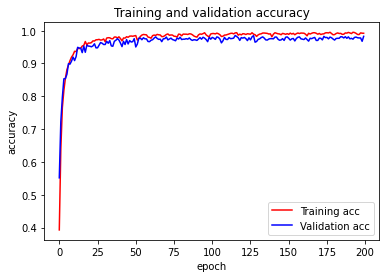

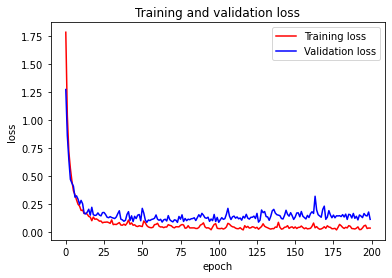

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()
plt.show()

In [ ]:

final_loss, final_acc = model.evaluate([x_test_chroma,x_test_mfcc],y_test, verbose=1)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))

final_loss, final_acc = model.evaluate([x_val_chroma,x_val_mfcc], y_val, verbose=1)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))



58/58 [==============================] - 0s 8ms/step - loss: 0.2523 - accuracy: 0.9671
Final loss: 0.252274, final accuracy: 0.967134
58/58 [==============================] - 0s 8ms/step - loss: 0.1841 - accuracy: 0.9693
Final loss: 0.184079, final accuracy: 0.969272


In [ ]:
score = model.evaluate([x_train_chroma,x_train_mfcc], y_spec_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate([x_test_chroma,x_test_mfcc], y_test, verbose=0)
print("Test Accuracy: ", score[1])

score = model.evaluate([x_val_chroma,x_val_mfcc], y_val, verbose=0)
print("val Accuracy: ", score[1])

Training Accuracy:  0.9973723292350769
Test Accuracy:  0.967133641242981
val Accuracy:  0.969272255897522


In [ ]:

final_loss, final_acc = model.evaluate([x_test_spectrogram,x_test_chroma,x_test_mfcc],y_test, verbose=1)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))

final_loss, final_acc = model.evaluate([x_val_spectrogram,x_val_chroma,x_val_mfcc], y_val, verbose=1)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))



58/58 [==============================] - 1s 10ms/step - loss: 0.2139 - accuracy: 0.9558
Final loss: 0.213915, final accuracy: 0.955819
58/58 [==============================] - 1s 12ms/step - loss: 0.2201 - accuracy: 0.9542
Final loss: 0.220080, final accuracy: 0.954178


In [ ]:
# Evaluating the model on the training and testing set
score = model.evaluate([x_train_spectrogram,x_train_chroma,x_train_mfcc], y_spec_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate([x_test_spectrogram,x_test_chroma,x_test_mfcc], y_test, verbose=0)
print("Test Accuracy: ", score[1])

score = model.evaluate([x_val_spectrogram,x_val_chroma,x_val_mfcc], y_val, verbose=0)
print("val Accuracy: ", score[1])

Training Accuracy:  0.9982482194900513
Test Accuracy:  0.9558189511299133
val Accuracy:  0.9541779160499573


In [ ]:
# Evaluating the model on the training and testing set
score = model.evaluate([x_train_spectrogram,x_train_chroma,x_train_mfcc], y_spec_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate([x_val_spectrogram,x_val_chroma,x_val_mfcc], y_val, verbose=0)
print("Val Accuracy: ", score[1])

score = model.evaluate([x_test_spectrogram,x_test_chroma,x_test_mfcc], y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9991914629936218
Val Accuracy:  0.982749342918396
Testing Accuracy:  0.977909505367279


In [ ]:

final_loss, final_acc = model.evaluate([x_test_spectrogram,x_test_chroma,x_test_mfcc], y_test, verbose=1)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))

final_loss, final_acc = model.evaluate([x_val_spectrogram,x_val_chroma,x_val_mfcc], y_val, verbose=1)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))



58/58 [==============================] - 1s 15ms/step - loss: 0.1562 - accuracy: 0.9779
Final loss: 0.156190, final accuracy: 0.977910
58/58 [==============================] - 1s 15ms/step - loss: 0.1113 - accuracy: 0.9827
Final loss: 0.111264, final accuracy: 0.982749


In [ ]:
#print('test data', test_data)
preds = np.round(model.predict([x_test_spectrogram,x_test_chroma,x_test_mfcc]),0) 
#to fit them into classification metrics and confusion metrics, some additional modificaitions are required
#print('rounded test_labels', preds)

In [ ]:
!pip install skmultilearn

ERROR: Could not find a version that satisfies the requirement skmultilearn (from versions: none)
ERROR: No matching distribution found for skmultilearn


In [ ]:
Classes_List=['air_conditioner','car_horn','children_playing','dog_bark','drilling','engine_idling','gun_shot','jackhammer','siren','street_music']

In [ ]:
import sklearn.metrics as metrics
classification_metrics = metrics.classification_report(y_test, preds, target_names=Classes_List )
print(classification_metrics)

                  precision    recall  f1-score   support

 air_conditioner       0.98      1.00      0.99       197
        car_horn       0.99      0.98      0.98       100
children_playing       0.94      0.98      0.96       203
        dog_bark       0.97      0.97      0.97       202
        drilling       0.97      0.99      0.98       203
   engine_idling       0.99      0.98      0.98       202
        gun_shot       0.97      0.99      0.98        89
      jackhammer       0.99      0.99      0.99       251
           siren       0.99      1.00      0.99       210
    street_music       0.99      0.91      0.95       199

       micro avg       0.98      0.98      0.98      1856
       macro avg       0.98      0.98      0.98      1856
    weighted avg       0.98      0.98      0.98      1856
     samples avg       0.98      0.98      0.98      1856



In [ ]:
#Since our data is in dummy format we put the numpy array into a dataframe and call idxmax axis=1 to return the column
# label of the maximum value thus creating a categorical variable
#Basically, flipping a dummy variable back to it's categorical variable
categorical_test_labels = pd.DataFrame(y_test).idxmax(axis=1)
categorical_preds = pd.DataFrame(preds).idxmax(axis=1)

In [ ]:
confusion_matrix= confusion_matrix(categorical_test_labels, categorical_preds)

In [ ]:
#To get better visual of the confusion matrix:
from itertools import product
def plot_confusion_matrix(cm, classes,
             normalize=False,
             title='Confusion matrix',
             cmap=plt.cm.Blues):
    #Add Normalization Option
    '''prints pretty confusion metric with normalization option '''
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
#     print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    #plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


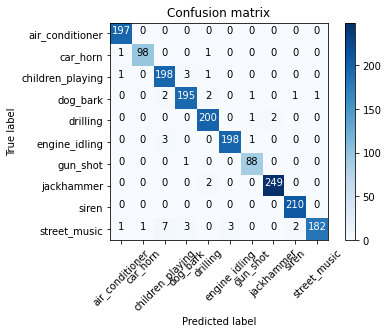

In [ ]:
plot_confusion_matrix(confusion_matrix, Classes_List)

Normalized confusion matrix


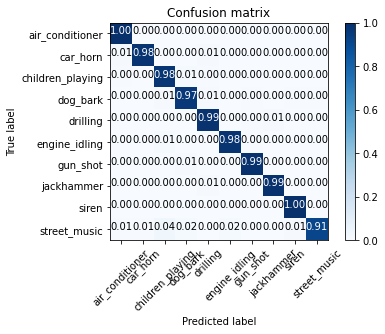

In [ ]:
plot_confusion_matrix(confusion_matrix, Classes_List,normalize=True)

In [ ]:
model.save("/content/drive/MyDrive/UrbanSound8K/my_model.h5")